<a href="https://colab.research.google.com/github/DataTak/study_deeplearning_fromscratch/blob/main/6%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학습 관련 기술들


## 매개변수 갱신
- 최적화: 손실 함수의 값을 가능한 한 낮추는 매개변수 찾는 것.
- 최적의 학습률을 찾기 위한 방법들

### SGD의 단점

In [1]:
#SGD
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]


- SGD(Stochastic Gradient Descent) 의 단점
    - 비등방성(anisotorpy) 함수(방향에 따라 성질, 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적.
    - 비등방성에 대한 추가 내용_GPT
1. 비등방성(Anisotropy)의 의미
(1) 등방성과 비등방성<br>
등방성(Isotropy): 손실 함수가 모든 방향에서 균일하게 변하는 경우.<br>
예: 이상적인 손실 함수 표면이 구형(둥글게 생긴 모양)일 때, 기울기는 항상 최적값으로 향하는 효율적인 방향을 가리킴.<br>
경사 하강법이 효율적으로 작동.<br>
비등방성(Anisotropy): 손실 함수가 특정 방향으로는 완만하게, 다른 방향으로는 급격하게 변하는 경우.<br>
예: 손실 함수가 길쭉한 타원형의 형태를 가질 때, 기울기가 최적값을 가리키지 않고 비효율적으로 수렴할 가능성이 있음.<br>
(2) 비등방성의 실제 손실 함수 표면<br>
딥러닝 모델의 손실 함수는 고차원 공간에서 매우 복잡하며, 비등방성이 강한 경우가 많습니다.<br>
특정 축(특성)의 변화에 따라 손실 값이 크게 변하거나 거의 변하지 않는 경우가 나타납니다.<br>
2. 비등방성이 경사 하강법에 미치는 영향<br>
(1) 효율적인 수렴 방해<br>
손실 함수가 타원형일 경우, SGD는 기울기가 큰 축(빠르게 변화하는 방향)으로는 과도하게 움직이고, 작은 축(느리게 변화하는 방향)으로는 느리게 움직입니다.<br>
결과적으로 최적값에 도달하기까지 비효율적인 경로를 따르게 됩니다.<br>
(2) 지그재그 경로<br>
비등방성에서는 SGD가 목표로 하는 최적값을 향해 바로 이동하지 못하고, 지그재그로 움직이며 느리게 수렴합니다.<br>
특히 학습률이 크면 더 심하게 진동할 수 있습니다.<br>
(3) 학습률 설정의 어려움<br>
학습률이 크면 진동이 심하고, 작으면 수렴 속도가 매우 느려질 수 있습니다.<br>
특정 방향에서는 적절한 학습률이지만, 다른 방향에서는 너무 크거나 작아질 수 있습니다.<br>

### 모멘텀(Momentum)
# 모멘텀(Momentum)에 대하여

**모멘텀(Momentum)**은 딥러닝에서 경사 하강법(Gradient Descent)의 변형 기법 중 하나로, 학습을 더 빠르고 안정적으로 진행하기 위해 사용됩니다. 모멘텀은 물리학에서의 운동량(momentum) 개념을 차용하여 모델의 가중치를 업데이트할 때 이전 기울기의 영향을 일정 부분 유지합니다.

---

## 1. 모멘텀의 동기

### (1) 기본 경사 하강법의 문제점
기본 경사 하강법은 기울기의 방향만을 따라 가중치를 업데이트합니다:
$$
w := w - \eta \cdot \nabla L(w)
$$

#### 문제점 1: 진동  
- 비등방성(Anisotropy)을 가진 손실 함수에서는 최적값으로 수렴하는 동안 특정 축에서 진동할 수 있습니다.  
- 예: 길쭉한 타원형 손실 함수에서 \( w_1 \) 축에서는 진동하며 \( w_2 \) 축에서는 느리게 이동.

#### 문제점 2: 느린 수렴  
- 평평한 지역(Plateau)에서는 기울기가 작아지며 학습이 매우 느려질 수 있습니다.

---

### (2) 모멘텀의 아이디어
모멘텀은 이전의 기울기 정보(운동량)를 고려하여 **진동을 줄이고, 최적점으로의 수렴 속도를 높이는 방법**입니다.

모멘텀은 이전 기울기의 일정 비율을 현재 기울기에 추가로 반영합니다. 이를 통해:
- **진동 완화**: 급격한 기울기 변화로 인한 진동 감소.
- **속도 증가**: 일정 방향으로 가중치 업데이트가 누적되면서 더 빠르게 수렴.

---

## 2. 모멘텀의 작동 원리

### (1) 기본 모멘텀 알고리즘
모멘텀은 다음 수식으로 정의됩니다:
$$
v_t = \beta \cdot v_{t-1} - \eta \cdot \nabla L(w_t)
$$
$$
w_t := w_t + v_t
$$

- \( v_t \): 현재 업데이트 방향 (모멘텀 벡터, Velocity).
- \( \beta \): 모멘텀 계수, 이전 기울기의 영향을 결정하는 값(보통 \( 0.9 \)).
- \( \eta \): 학습률 (Learning Rate).
- \( \nabla L(w_t) \): 현재 기울기(Gradient).

### (2) 모멘텀 업데이트 과정
1. 현재 기울기 \( \nabla L(w_t) \)를 계산.
2. 이전 모멘텀 \( v_{t-1} \)의 영향을 \( \beta \) 비율로 더함.
3. \( v_t \)에 따라 \( w_t \)를 업데이트.

### (3) 물리학적 비유
- 모멘텀은 물체가 기울기 방향으로 **관성**을 가지고 움직이는 것과 유사합니다.
- \( \beta \): 마찰 계수와 유사하며, \( \beta \)가 클수록 관성이 커지고, 작을수록 저항이 큼.

---

## 3. 모멘텀의 효과

### (1) 진동 감소
- 비등방성 손실 함수에서 \( \beta \) 계수를 사용하면, 진동을 줄이고 최적값으로 더 효율적으로 수렴합니다.
- 예: 타원형 손실 함수에서 \( w_1 \) 축으로의 불필요한 진동이 줄어듦.

### (2) 수렴 속도 향상
- 평평한 지역(Plateau)에서는 기울기가 작더라도 이전 업데이트의 영향을 유지해 수렴 속도를 증가시킵니다.

### (3) 안정성 증가
- 기울기가 급격히 변화하거나, 지역 최적값에 갇히는 문제를 완화합니다.

---


In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

## AdaGrad
# Adagrad와 RMSProp 비교

## 1. **Adagrad (Adaptive Gradient Algorithm)**

**핵심 아이디어**  
- 매개변수마다 학습률을 다르게 조정.  
- 자주 업데이트되는 파라미터의 학습률은 작게, 드물게 업데이트되는 파라미터의 학습률은 크게 조정.

**동작 원리**  
- 각 파라미터의 과거 그래디언트 제곱합을 저장하여 학습률을 조정.  
- 학습률 업데이트 공식:  
  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot g_t
  $$
  - $G_t = \sum_{i=1}^t g_i^2$: 그래디언트 제곱합  
  - $\eta$: 초기 학습률  
  - $\epsilon$: 0으로 나눔 방지를 위한 작은 값  
  - $g_t$: 현재 그래디언트

**장점**  
- 자주 업데이트되는 파라미터의 학습률이 감소하여 학습 안정성이 증가.  
- 드물게 업데이트되는 파라미터의 학습률은 커져 학습 수렴 속도가 개선.  

**단점**  
- $G_t$가 계속 누적되어 학습률이 점점 0에 가까워지는 문제 발생.  

---

## 2. **RMSProp (Root Mean Square Propagation)**

**핵심 아이디어**  
- Adagrad의 단점을 개선하기 위해, 그래디언트 제곱합 대신 **지수 이동 평균(Exponential Moving Average)**을 사용.  
- 학습률 감소 문제를 완화하여 안정적이고 효율적인 학습 제공.  

**동작 원리**  
- 그래디언트의 제곱합 대신 지수 이동 평균을 사용.  
  $$
  E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2
  $$
- 학습률 조정 공식:  
  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
  $$
  - $\gamma$: 지수 이동 평균의 감쇠율 (일반적으로 0.9 사용)  
  - $E[g^2]_t$: 그래디언트 제곱의 지수 이동 평균  

**장점**  
- Adagrad의 학습률 감소 문제를 해결.  
- 학습률이 동적으로 조정되어 안정적인 수렴을 보장.  

**단점**  
- 추가적인 하이퍼파라미터 $\gamma$의 조정 필요.  

---

## 3. **비교**

| 알고리즘  | 특징                                      | 장점                                    | 단점                           |
|-----------|------------------------------------------|-----------------------------------------|--------------------------------|
| **Adagrad** | 매개변수별 학습률 조정 (그래디언트 제곱합 사용) | 드물게 업데이트되는 파라미터 학습 향상 | 학습률이 점점 0으로 감소       |
| **RMSProp** | 지수 이동 평균으로 학습률 감소 문제 완화   | 안정적이고 빠른 수렴                    | 감쇠율 $\gamma$ 조정 필요 |


In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) #1e-7은 0으로 나누는 것을 막기 위해 적용

### Adam
- 모멘텀과 AdaGrad를 융합한 듯한 방법.
- 그릇 바닥을 구르듯 움직임. 모멘텀과 비슷한 패턴인데 모멘텀 때보다 공의 좌우 흔들림이 적음.
    - 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택.

- SGD는 단순하며 소규모 모델이나 학습에서 효과적이지만, 진동과 느린 수렴이 단점입니다.
- Momentum은 SGD의 단점을 개선하여 복잡한 모델에서도 잘 동작하지만, 하이퍼파라미터 설정이 필요합니다.
- Adagrad는 희소 데이터 처리에 적합하지만, 학습률 감소로 긴 학습 과정에서는 한계가 있습니다.
- Adam은 빠르고 안정적이며, 거의 모든 딥러닝 모델에서 잘 동작해 기본 알고리즘으로 많이 사용됩니다.
- Adam은 대부분의 경우 "좋은 시작점"이지만, 데이터와 모델 구조에 따라 다른 알고리즘이 더 적합할 수도 있습니다. 😊

## 가중치의 초깃값

- 가중치 감소(weight decay) 기법
    - 가중치 매개변수의 값이 작아지도록 학습하는 방법.
    - 가중치 값을 작게 하여 오버피팅이 일어나지 않게 한다.
    - 초깃값을 모두 0으로 설정한다면?
        - 뉴런들이 동일한 계산을 수행합니다.
        - 역전파(Backpropagation) 과정에서 모든 뉴런의 그래디언트도 동일하게 계산됩니다.
        - 결과적으로, 뉴런들이 서로 구별되지 못하고 동일하게 학습됩니다.
        - 예를 들어 모든 학생들이 동일한 교과서, 동일한 문제만 공부한다면 반 전체적으로 본다면 모두 똑같은 답, 결과 / 다양하게 본다면 다양한 답이 나올 수 있음.

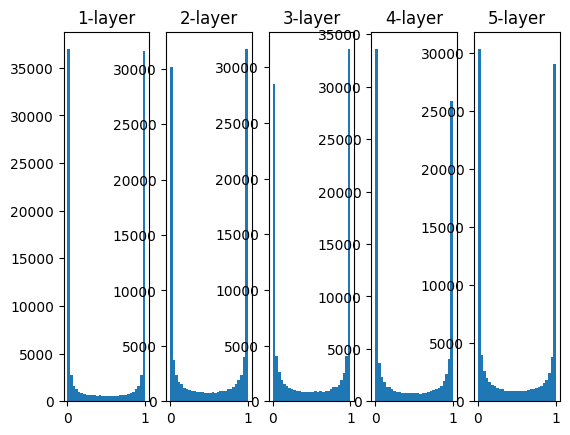

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i !=0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- Xavier 초깃값을 가중치 초깃값으로 사용하라!
- 그런데 이것은 활성화 함수가 선형인 것을 전제로 하였다.
- ReLudpsms He 초깃값을 사용!
### 차이점

| 초기화 방법  | 적합한 활성화 함수       | 활성화 값 분포의 특징                           |
|--------------|-------------------------|-----------------------------------------------|
| **Xavier**   | sigmoid, tanh          | 분포가 균등하게 유지되지만 ReLU에서는 소실 가능. |
| **He**       | ReLU, Leaky ReLU       | ReLU 특성에 맞게 분산을 보정하여 소실 방지.      |


### MNIST 데이터셋으로 본 가중치 초깃값 비교


!["가중치의 초깃값"](https://cael0.github.io/assets/images/2021_08_12/6_2_4.PNG)
- 출처: https://cael0.github.io/deep%20learning/DeepLearningCh6/

## 배치정규화

![배치정규화](https://cael0.github.io/assets/images/2021_08_12/6_3_1_1.PNG)
- 출처: https://cael0.github.io/deep%20learning/DeepLearningCh6/

- 미니배치 입력 데이터를 평균 0, 분산1인 데이터로 변환하는 일.
- 이 처리를 활성화 함수의 앞(또는 뒤)에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있음. <br>
<주요 특징>
- 내부 공변량 변화 문제를 완화.
- 학습률을 더 크게 설정 가능.
- 규제 효과를 통해 과적합 감소.
- 하지만, 작은 배치 크기에서는 성능이 떨어질 수 있습니다.
### **배치 정규화와 다른 정규화 기법 비교**

| **기법**            | **적용 위치**                   | **주요 효과**                          |
|---------------------|--------------------------------|---------------------------------------|
| **배치 정규화**     | 미니배치 단위로 레이어 내 정규화 | 학습 가속화, 기울기 안정화.            |
| **레이어 정규화**   | 레이어 전체로 정규화           | RNN 등 순차적 데이터에 적합.           |
| **그룹 정규화**     | 채널을 그룹으로 나눠 정규화      | 작은 배치 크기에서도 잘 동작.           |


## 오버피팅


- 주로 일어나는 경우
    - 매개변수가 많고 표현력이 높은 모델
    - 훈련 데이터가 적음


In [6]:
# 저자 깃 저장소 클론
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 853, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 853 (delta 9), reused 13 (delta 5), pack-reused 830 (from 1)
Receiving objects: 100% (853/853), 52.33 MiB | 25.28 MiB/s, done.
Resolving deltas: 100% (486/486), done.


In [7]:
import sys, os
sys.path.append("/content/deep-learning-from-scratch")  #불러온 깃 저장소를
from dataset.mnist import load_mnist

In [8]:
# 오버피팅 예시
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 오버피팅을 재현하기 위해 학습 데이터 수 줄임
x_train = x_train[:300]
t_train = t_train[:300]

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [11]:
from ch06.overfit_weight_decay import MultiLayerNet

In [12]:
network = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

In [18]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
           break

![코드 그래프 그린 결과](https://cael0.github.io/assets/images/2021_08_12/6_4_1.PNG)
- 출처: https://cael0.github.io/deep%20learning/DeepLearningCh6/

- 100 에폭을 지나면 정확도는 거의 100%에 가까움.
- 하지만 테스트 데이터에대해서는 그만큼 성능이 나오지 못함. 훈련 데이터에 맞도록 모델이 만들어진 오버피팅모델!
- 해결 방법: 가중치 감소
### **L2 법칙 적용 방법**

L2 정규화를 적용한 손실 함수는 다음과 같이 정의됩니다:

$$
L_{\text{total}} = L + \lambda \sum_{i=1}^n w_i^2
$$

여기서:

- $( L_{\text{total}} )$: 정규화가 적용된 최종 손실.
- \( L \): 원래의 손실 함수 (예: 평균 제곱 오차(MSE), 크로스엔트로피 등).
- $( \lambda )$: 규제 강도를 조절하는 하이퍼파라미터.
  - $( \lambda )$가 클수록 규제 효과가 커짐.
  - $( \lambda = 0 )$이면 규제가 적용되지 않음.
- $( w_i )$: 모델의 각 가중치.


## 드롭아웃
- L2 법칙을 적용하면 가중치 감소를 간단하게 구현할 수 있음.
- 하지만 신경망이 복잡해지면 가중치 감소만으로는 대응하기 어려워짐.
- 이때 드롭아웃 기법을 이용

!['드롭아웃'](https://cael0.github.io/assets/images/2021_08_12/6_4_3_1.PNG)
- 출처: https://cael0.github.io/deep%20learning/DeepLearningCh6/

- 드롭아웃은 뉴런을 임의로 삭제하면서 학습하는 방법
- 훈련 때 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택, 시험 때는 모든 뉴런에 신호를 진달
- 시험 때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력

In [19]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_falg=True):
        if train_flag:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def bckwark(self, dout):
        return dout * self.mask

## 적절한 하이퍼파라미터 값 찾기
- 하이퍼파라미터를 찾을 때에는 시험 데이터를 사용하면 안된다.
- 하이퍼파라미터 값이 시험 데이터에 오버피팅이 되기 때문이다.
    - 따라서 하이퍼파라미터를 조정하는 검증데이터(validation data)가 필요하다.

- 신경망의 하이퍼파라미터 최적화는 그리드서치(grid search)같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 편이 좋은 결과를 낼수 있음.
    - 이는 최종 정확되에 미치는 영향력이 하이퍼파라미터마다 다르기 때문
- 하이퍼파라미터의 범위는 '대력적'으로 지정하는 것이 효과적.
    - 0.001 ~ 1000 사이에서 로그스캐일 단위로 지정
- 하이퍼파라미터 최적화에는 오랜시간이 걸림(며칠~몇 주 이상)
    - 나쁠 듯한 값은 일찍 포기하는 것이 좋음.
    - 학습을 위한 에폭을 작게 하여 1회 평가에 걸리는 시간을 단축하는 것이 효과적
- 더 세련된 기법은 베이즈 최적화(Bayesian optimization)

<위의 내용을 정리하면> <br>
- 0단계: 하이퍼파라미터 값의 범위 설정
- 1단계: 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
- 2단계: 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습, 검증 데이터로 정확도를 평가(에폭은 작게 설정)
- 3단계: 1단계와 2단계를 특정 횟수(100회 등) 반복하여 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

## 정리

- 매개변수 갱신 방법에는 확률적 경사하강법, 모멘텀, AdaGrad, Adam 등이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다.
- 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.